In [76]:
import pandas as pd
import numpy as np
import openpyxl
import os
import sys
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 150
pd.options.display.max_rows = None

In [77]:
# utils
sys.path.append(os.path.abspath(os.path.join('utils/')))
from valores_ausentes import *
from trat_outliers import *
from conversao_dados import *

In [78]:
print(f"Este notebook utiliza a versao {sys.version} do Python e sua ultima execução foi em {pd.Timestamp.now()}")

Este notebook utiliza a versao 3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)] do Python e sua ultima execução foi em 2023-01-02 15:12:36.895683


In [79]:
dicionario = pd.read_excel('originals_data\dados_popoulacao_rua\censo_populacao_rua.xlsx', engine='openpyxl')
dicionario.shape

(132, 5)

In [80]:
dicionario.shape

(132, 5)

In [81]:
lista_labels_valores_ausentes = ['n/a', 'na', 'undefined', 'null', 'none', 'nan', ' ', '' ]  

In [82]:
# ## Carregando os dados
df = pd.read_csv('originals_data\dados_popoulacao_rua\dados_censo.csv', na_values = lista_labels_valores_ausentes)
df.shape

(7272, 132)

In [83]:
df.head()

,id,rua_acolhimento,local_da_coleta_de_dados,unidade_de_acolhimento_us,metodo,turno,data,id_bairro,bairro,ap,codigo_da_rp,rp,codigo_da_ra,ra,latitude,longitude,situacao_entrevista,motivo_situacao_impossivel,dormiu_na_rua_ultimos_7_dias,respondeu_ao_questionario,questionario_de_observacao,idade,faixa_etaria,classificacao_idade,faixa_etaria_observada,sexo,genero,cor_raca,deficiencia_caminhar_ou_degraus,deficiencia_enxergar,deficiencia_ouvir,deficiencia_mental,deficiencia_nao_possui,deficiencia_ns_nr,documento_certidao_de_nascimento,documento_cpf,documento_carteira_de_identidade,documento_carteira_de_trabalho,documento_titulo_de_eleitor,documento_passaporte,documento_red,naturalidade,estado,municipio,voltar_cidade_natal,contato_familia,contato_familia_complemento,familia_dorme_rua_acolhimento,ha_criancas,residencia_fixa,residencia_fixa_complemento,dias_dormiu_rua_ultimos_30dias,motivo_dormir_rua,tempo_rua_rj,rua_inicio_coronavirus,motivo_rua_depois_coronavirus,ajuda_pandemia,ajuda_auxilio_emergencial,ajuda_alimentos,ajuda_itens_higiene,ajuda_mascaras_protecao,ajuda_oferta_lugares_higiene,ajuda_ns_nr,local_anterior_dormitorio,local_dormitorio,dormiu_rua_maioria_ultimos_7dias,lugar_7_dias,bairro_7_dias,dormiu_abrigo_prefeitura,dormiu_abrigo_quanto_tempo,dificuldade_abrigo,onde_estava_antes_acolhimento,abrigos_apresentam_problemas,principal_problema_abrigo,foi_atendido_cras,foi_atendido_creas,foi_atendido_centro_pop,foi_atendido_abordagem_social,foi_atendido_conselho_tutelar,foi_atendido_acolhimento,foi_atendido_central_de_recepcao,foi_atendido_hotel,foi_atendido_defensoria_publica,foi_atendido_nao_foi_atendido,foi_atendido_ns/nr,dificuldades_atendimento_servico,atividade_remunerada,atividade_realizada,recebe_outras_fontes_de_renda,outras_fontes_bolsa_familia,outras_fontes_aux_emergencial,outras_fontes_bpc,outras_fontes_aposentado_pensao,outras_fontes_auxilio_doenca,outras_fontes_aht_aluguel_social,outras_fontes_outros,outras_fontes_nao_recebe,outras_fontes_ns/nr,gravidez,acompanhamento_pre_natal,problema_saude_diabetes,problema_saude_pressao_alta,problema_saude_hiv_aids,problema_saude_sifilis_ou_ists,problema_saude_asma_bronq_pneum,problema_saude_tuberculose,problema_saude_cancer_tumores,problema_saude_hepatite,problema_saude_mental_epilepsia,problema_saude_lepra_outras,problema_saude_infeccao_urinaria,problema_saude_ferim_frat_outros,qual_unidade_saude_procura,faz_uso_drogas,drogas_tabaco,drogas_alcool,drogas_maconha_haxixe,drogas_crack_similares,drogas_cocaina,drogas_inalan_cola_solven_tiner,frequencia_tabaco,frequencia_alcool,frequencia_maconha/haxixe,frequencia_crack/similares,frequencia_cocaina,frequencia_inal_cola_solv_tiner,motivo_droga,motivo_local_uso_droga,sabe_ler_escrever,frequentou_escola,escolaridade,necessidade_sair_situacao
0,0,Rua,Rua,NaN,Entrevista,Manhã,26/10/2020,NaN,Paciência,AP 5,5.3,5.3 - Santa Cruz,19,XIX - SANTA CRUZ,-22.917108,-43.634687,Possível,Não se aplica,Sim,Sim,Não,22,18 a 30,Adulto,Não se aplica,Masculino,Homem Cis,Preta,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Sim,Não selecionou,"Tive, mas não tenho mais","Tive, mas não tenho mais","Tive, mas não tenho mais","Tive, mas não tenho mais","Tive, mas não tenho mais",Nunca tive,Nunca tive,No Município do Rio de Janeiro,Rio de Janeiro,Não se aplica,Não se aplica,Não,Não,Não,Não,Não,Não,NS/NR,NS/NR,NS/NR,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,NS/NR,Não se aplica,Rua,Em um BAIRRO da cidade do Rio de Janeiro,Paciência,Não,Não se aplica,Não,NaN,Não,Não se aplica,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Sim,Não selecionou,Não,Não,Não se aplica,Sim,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Não selecionou,Sim,Não selecionou,Não se aplica,Não se aplica,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Hospital ou CER,Não,Não,Não,N

In [84]:
df.dtypes

id                                    int64
rua_acolhimento                      object
local_da_coleta_de_dados             object
unidade_de_acolhimento_us            object
metodo                               object
turno                                object
data                                 object
id_bairro                           float64
bairro                               object
ap                                   object
codigo_da_rp                        float64
rp                                   object
codigo_da_ra                          int64
ra                                   object
latitude                            float64
longitude                           float64
situacao_entrevista                  object
motivo_situacao_impossivel           object
dormiu_na_rua_ultimos_7_dias         object
respondeu_ao_questionario            object
questionario_de_observacao           object
idade                                 int64
faixa_etaria                    

Os dados precisam ser tratados para que possamos analisá-los. Para isso, vamos criar uma função que recebe um DataFrame e retorna um novo DataFrame com as colunas que iremos utilizar na análise.

In [85]:
def selecionar_colunas(df, colunas):
    return df[colunas]


df2 = selecionar_colunas(df, ['id', 
                                'data', 
                                'sexo',
                                'genero',
                                'cor_raca',
                                'faz_uso_drogas',
                                'idade',
                                'faixa_etaria',
                                'classificacao_idade',
                                'faixa_etaria_observada',
                                'drogas_tabaco',
                                'drogas_alcool',
                                'drogas_maconha_haxixe',
                                'drogas_crack_similares',
                                'drogas_cocaina',
                                'drogas_inalan_cola_solven_tiner',
                                'frequencia_tabaco',
                                'frequencia_alcool',
                                'frequencia_maconha/haxixe',
                                'frequencia_crack/similares',
                                'frequencia_cocaina',
                                'frequencia_inal_cola_solv_tiner'])

## Convertendo tipos de dados

In [86]:
df2.head()

,id,data,sexo,genero,cor_raca,faz_uso_drogas,idade,faixa_etaria,classificacao_idade,faixa_etaria_observada,drogas_tabaco,drogas_alcool,drogas_maconha_haxixe,drogas_crack_similares,drogas_cocaina,drogas_inalan_cola_solven_tiner,frequencia_tabaco,frequencia_alcool,frequencia_maconha/haxixe,frequencia_crack/similares,frequencia_cocaina,frequencia_inal_cola_solv_tiner
0,0,26/10/2020,Masculino,Homem Cis,Preta,Não,22,18 a 30,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
1,1,26/10/2020,Masculino,Homem Cis,Preta,Não,45,31 a 49,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
2,2,26/10/2020,Masculino,Homem Cis,Preta,Não,44,31 a 49,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
3,3,26/10/2020,Feminino,Mulher Cis,Branca,Não,57,50 a 59,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
4,4,26/10/2020,Masculino,Homem Cis,Preta,Sim,32,31 a 49,Adulto,Não se aplica,Sim,Sim,Sim,Sim,Sim,Sim,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica


In [87]:
df2.dtypes

id                                  int64
data                               object
sexo                               object
genero                             object
cor_raca                           object
faz_uso_drogas                     object
idade                               int64
faixa_etaria                       object
classificacao_idade                object
faixa_etaria_observada             object
drogas_tabaco                      object
drogas_alcool                      object
drogas_maconha_haxixe              object
drogas_crack_similares             object
drogas_cocaina                     object
drogas_inalan_cola_solven_tiner    object
frequencia_tabaco                  object
frequencia_alcool                  object
frequencia_maconha/haxixe          object
frequencia_crack/similares         object
frequencia_cocaina                 object
frequencia_inal_cola_solv_tiner    object
dtype: object

In [88]:
convert_to_datetime(df2, ['data'])

In [89]:
# Extrai as colunas do tipo object
string_columns = df2.select_dtypes(include = 'object').columns.tolist()
string_columns

['sexo',
 'genero',
 'cor_raca',
 'faz_uso_drogas',
 'faixa_etaria',
 'classificacao_idade',
 'faixa_etaria_observada',
 'drogas_tabaco',
 'drogas_alcool',
 'drogas_maconha_haxixe',
 'drogas_crack_similares',
 'drogas_cocaina',
 'drogas_inalan_cola_solven_tiner',
 'frequencia_tabaco',
 'frequencia_alcool',
 'frequencia_maconha/haxixe',
 'frequencia_crack/similares',
 'frequencia_cocaina',
 'frequencia_inal_cola_solv_tiner']

In [90]:
convert_to_string(df2, string_columns)

In [91]:
df2.dtypes

id                                          int64
data                               datetime64[ns]
sexo                                       string
genero                                     string
cor_raca                                   string
faz_uso_drogas                             string
idade                                       int64
faixa_etaria                               string
classificacao_idade                        string
faixa_etaria_observada                     string
drogas_tabaco                              string
drogas_alcool                              string
drogas_maconha_haxixe                      string
drogas_crack_similares                     string
drogas_cocaina                             string
drogas_inalan_cola_solven_tiner            string
frequencia_tabaco                          string
frequencia_alcool                          string
frequencia_maconha/haxixe                  string
frequencia_crack/similares                 string


## Verificando duplicatas

In [92]:
# Vamos checar se há registros duplicados
drop_duplicates(df2)

Nenhuma linha duplicada foi encontrada.


In [93]:
df2.head()

,id,data,sexo,genero,cor_raca,faz_uso_drogas,idade,faixa_etaria,classificacao_idade,faixa_etaria_observada,drogas_tabaco,drogas_alcool,drogas_maconha_haxixe,drogas_crack_similares,drogas_cocaina,drogas_inalan_cola_solven_tiner,frequencia_tabaco,frequencia_alcool,frequencia_maconha/haxixe,frequencia_crack/similares,frequencia_cocaina,frequencia_inal_cola_solv_tiner
0,0,2020-10-26,Masculino,Homem Cis,Preta,Não,22,18 a 30,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
1,1,2020-10-26,Masculino,Homem Cis,Preta,Não,45,31 a 49,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
2,2,2020-10-26,Masculino,Homem Cis,Preta,Não,44,31 a 49,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
3,3,2020-10-26,Feminino,Mulher Cis,Branca,Não,57,50 a 59,Adulto,Não se aplica,Não,Não,Não,Não,Não,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica
4,4,2020-10-26,Masculino,Homem Cis,Preta,Sim,32,31 a 49,Adulto,Não se aplica,Sim,Sim,Sim,Sim,Sim,Sim,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica


In [94]:
def contar_ns_nr(df):
    resultado = {}
    for coluna in df.columns:
        resultado[coluna] = df[coluna].isin(['NS/NR']).sum()
    return resultado

In [95]:
contar_ns_nr(df2)

{'id': 0,
 'data': 0,
 'sexo': 0,
 'genero': 96,
 'cor_raca': 0,
 'faz_uso_drogas': 0,
 'idade': 0,
 'faixa_etaria': 0,
 'classificacao_idade': 0,
 'faixa_etaria_observada': 0,
 'drogas_tabaco': 9,
 'drogas_alcool': 15,
 'drogas_maconha_haxixe': 12,
 'drogas_crack_similares': 14,
 'drogas_cocaina': 18,
 'drogas_inalan_cola_solven_tiner': 26,
 'frequencia_tabaco': 11,
 'frequencia_alcool': 9,
 'frequencia_maconha/haxixe': 7,
 'frequencia_crack/similares': 5,
 'frequencia_cocaina': 10,
 'frequencia_inal_cola_solv_tiner': 3}

In [97]:
def valores_distintos_com_total_df(df, colunas):
    resultado = {}
    for coluna in colunas:
        valores, contagem = np.unique(df[coluna], return_counts=True)
        resultado[coluna] = {"valores": valores, "total": contagem}

    df_resultado = pd.DataFrame(resultado).transpose()
    df_resultado.reset_index(inplace=True)
    df_resultado.rename(columns={"index": "coluna"}, inplace=True)
    df_resultado["coluna"] = df_resultado["coluna"].astype(str)

    return df_resultado

In [98]:
valores_distintos_com_total_df(df2, ['sexo'])

,coluna,total,valores
0,sexo,"[1360, 5871, 41]","[Feminino, Masculino, Não identificado]"


In [130]:
valores_distintos_com_total_df(df2, ['drogas_crack_similares'])

,coluna,total,valores
0,drogas_crack_similares,"[14, 3149, 3312, 797]","[NS/NR, Não, Não se aplica, Sim]"


## Uso de drogas (crack)

In [115]:
import matplotlib.pyplot as plt

def plotar_pizza(df, coluna):
    valores = df[coluna].value_counts()
    total = sum(valores)
    
    plt.pie(valores, labels=valores.index, autopct=lambda x: f'{x:.1f}%')
    plt.title(f'{coluna}: distribuição (%)', y=1.1)
    plt.show()


In [118]:
def plotar_barras_com_porcentagem(df, coluna):
    valores = df[coluna].value_counts()
    total = sum(valores)
    
    fig, ax = plt.subplots()
    ax.bar(valores.index, valores)
    ax.set_title(f'{coluna}: valor absoluto e porcentagem')
    
    for i, v in enumerate(valores):
        ax.text(i, v, f'{v} ({v/total:.1%})', ha='center')
    
    plt.show()

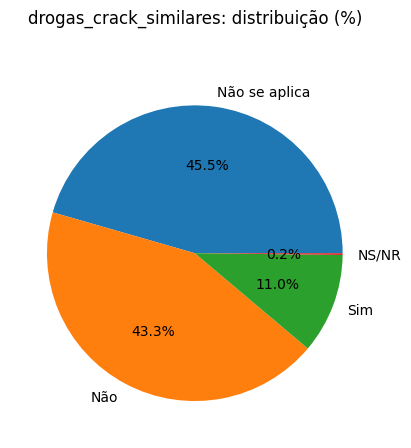

In [128]:
plotar_pizza(df2, 'drogas_crack_similares')

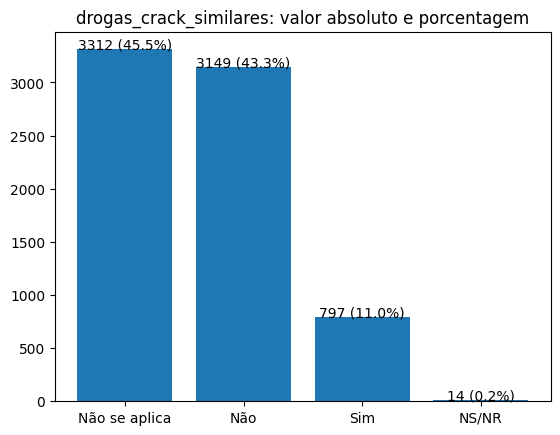

In [129]:
plotar_barras_com_porcentagem(df2, 'drogas_crack_similares')

11% dos entrevistados usam crack ou similares. Vamos analisar a frequência de uso.

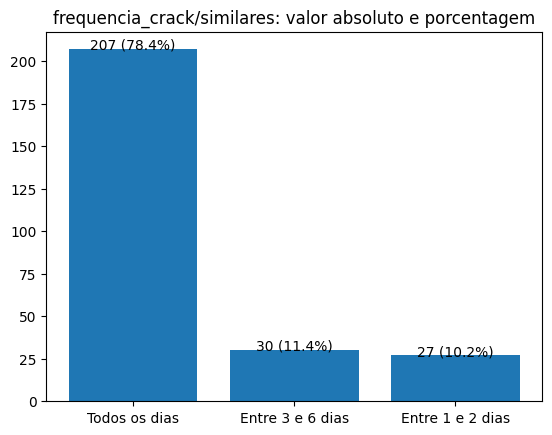

In [133]:
# plotar a coluna 'frequencia_crack/similares' com excessão dos valores 'NS/NR', 'Não se aplica' e 'Não usou'

plotar_barras_com_porcentagem(df2[df2['frequencia_crack/similares'].isin(['NS/NR', 'Não se aplica', 'Não usou']) == False], 'frequencia_crack/similares')

78,4 % dos entrevistados que usam crack ou similares usam diariamente.

## Valores ausentes

In [124]:
def contar_valores_ausentes(df, coluna):
    return df[coluna].isnull().sum()


In [127]:
contar_valores_ausentes(df2, '')

0

In [121]:
func_calc_percentual_valores_ausentes(df2)

O dataset tem 1.15 % de valores ausentes.


In [122]:
func_calc_percentual_valores_ausentes_linha(df2)

25.26 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [134]:
func_calc_percentual_valores_ausentes_coluna(df2)

O dataset tem 22 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
data,1837,25.26,datetime64[ns]
